In line with the linear regression models covered in chapter 2, generalized linear models are based on the assumption that there is a linear relationship between input (features) X and output (target) Y. The central difference between the two is that while linear regression models assumes "continous" relationship between x and y (e.g., the increase in the value of Y depending on the increase in the value of X), generalized linear models are based on the concept of "probabilities". For example, when the output Y consists of classification data (e.g., 0, 1), the beta coefficients depict the probabilities of y being either 1 or 0.

To illustrate, let us assume that 

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [62]:
x, y = datasets.make_classification(
    n_samples=8, n_features=2, n_classes=2, random_state=123,
    n_informative=1, n_redundant=0, n_clusters_per_class=1
)
np.c_[y, x]

array([[ 1.        , -0.11166034,  2.20593008],
       [ 1.        ,  1.75652211, -0.43435128],
       [ 1.        ,  0.80351538,  2.18678609],
       [ 0.        , -1.0887545 ,  1.49138963],
       [ 0.        , -0.52755975, -0.638902  ],
       [ 0.        , -0.65949851, -0.67888615],
       [ 1.        ,  0.73494356, -0.44398196],
       [ 0.        , -1.31281138, -0.09470897]])

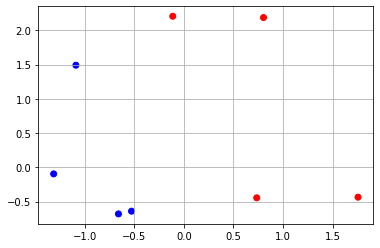

In [63]:
#Visualization
plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')
plt.grid()
plt.show()


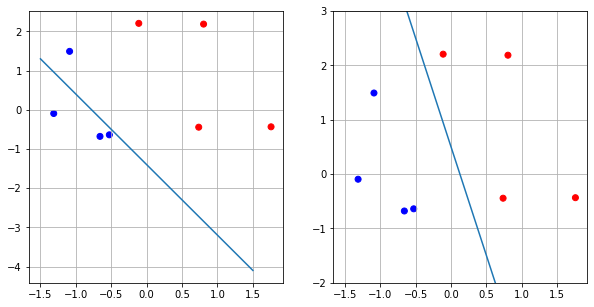

In [64]:
#Classification (1)
xx = np.linspace(-1.5,1.5, 100)
f = -1.8*xx-1.4
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')
plt.plot(xx, f)
plt.grid()

f2 = -4*xx+0.5
plt.subplot(1,2,2)
plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')
plt.plot(xx, f2)
plt.grid()

plt.ylim([-2, 3])
plt.show()

#In this case, it is relatively easier to decide which model is better; it can be stated that 'f1' is a better model than 'f' because 'f' has one (blue dot) misclassficiation. 


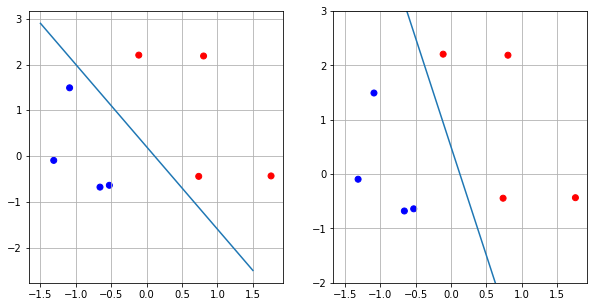

In [65]:
xx = np.linspace(-1.5,1.5, 100)
f = -1.8*xx+.2
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')
plt.plot(xx, f)
plt.grid()

f2 = -4*xx+0.5
plt.subplot(1,2,2)
plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')
plt.plot(xx, f2)
plt.grid()

plt.ylim([-2, 3])
plt.show()

#In this case, however, it is difficult to decide which model is better. Such ambiguity calls for a "Continuous" evaluation method with the conecept of "probability". 

In [66]:
#MLE (Maximum Likelihood Estimation)
#MLE is an estimation method aiming to maximize the probability of getting the right estimation value
#Assume that the probabilities of having 1 and 0 are respectively:

P = np.array([
    [0.85, 0.15],
    [0.25, 0.75],
    [0.77, 0.23],
    [0.12, 0.88],
    [0.25, 0.75],
    [0.87, 0.13],
    [0.57, 0.43],
    [0.48, 0.52]
])

In [67]:
P

array([[0.85, 0.15],
       [0.25, 0.75],
       [0.77, 0.23],
       [0.12, 0.88],
       [0.25, 0.75],
       [0.87, 0.13],
       [0.57, 0.43],
       [0.48, 0.52]])

In [68]:
#With probabilities defined as such, the error function for this classification model is defined as:

In [69]:
model = LogisticRegression().fit(x, y)

In [70]:
model.predict_proba(x)

array([[0.29491425, 0.70508575],
       [0.12524375, 0.87475625],
       [0.11285125, 0.88714875],
       [0.68629379, 0.31370621],
       [0.76111068, 0.23888932],
       [0.79456968, 0.20543032],
       [0.35461747, 0.64538253],
       [0.87041348, 0.12958652]])

In [71]:
x1, x2 = x[:,0], x[:,1]

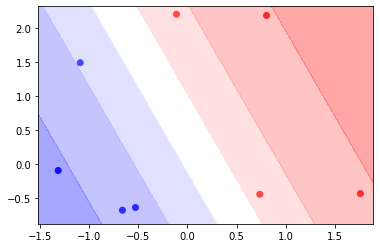

In [79]:
xy1, xy2 = np.meshgrid(
    np.arange(x1.min() - 0.2, x1.max() + 0.2, 0.1),
    np.arange(x2.min() - 0.2, x2.max() + 0.2, 0.1)
)
xx = np.c_[xy1.flatten(), xy2.flatten()]
yhat = model.predict_proba(xx)

plt.scatter(x1, x2, c=y, cmap='bwr')
plt.contourf(xy1, xy2, yhat[:,1].reshape(xy1.shape), cmap='bwr', alpha=0.4)
plt.show()